Stats descriptives des bases de données pour une première analyse

1) Importation des bases que l'on va utiliser

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text #à importer dans le terminal avec pip install

# Importer 3 bases CSV
df_voit = pd.read_csv("../Bases/q_voitvul_public_V3.csv", delimiter=";",encoding="ISO-8859-1")  # Modifie le délimiteur si nécessaire
df_tcmmen = pd.read_csv("../Bases/tcm_men_public_V3.csv", delimiter=",",encoding="ISO-8859-1")  # Modifie le délimiteur si nécessaire
df_men = pd.read_csv("../Bases/q_menage_public_V3.csv", delimiter=";",encoding="ISO-8859-1")  # Modifie le délimiteur si nécessaire


/tmp/ipykernel_9949/1394721137.py:8: DtypeWarning: Columns (63) have mixed types. Specify dtype option on import or set low_memory=False.
  df_tcmmen = pd.read_csv("../Bases/tcm_men_public_V3.csv", delimiter=",",encoding="ISO-8859-1")  # Modifie le délimiteur si nécessaire


2. Analyse des bases chargées  
2.1 Analyse de la base VoitVul : 

In [37]:
#Affiche table voiturevul
print(df_voit.head())  # Affiche les 5 premières lignes

      IDENT_NUMVEH      IDENT_MEN  NUM_VEH     pond_veh  KVROUL  \
0  110000011400001  1100000114000        1  1842.977077       1   
1  110000011500001  1100000115000        1  1948.382441       1   
2  110000011500002  1100000115000        2  1948.382441       1   
3  110000011600001  1100000116000        1   833.453670       1   
4  110000012400001  1100000124000        1  1698.142782       1   

   cylindree_fin energie_fin  energie_agrege hybride  energie_statinfo  ...  \
0            1.6          ES             1.0     NaN               2.0  ...   
1            1.6          GO             2.0     NaN               4.0  ...   
2            1.4          ES             1.0     NaN               2.0  ...   
3            1.6          ES             1.0     NaN               2.0  ...   
4            1.5          GO             2.0     NaN               4.0  ...   

   KVKMVT      KVKM1ANV  indic_km_annu_corr KVKM1ANVT  KVCONS KVGAREJOUR  \
0     4.0   2478.916193             INTERPO   

In [38]:
#Convertir les variables identifiants voitures et ménages en string
df_voit[["IDENT_NUMVEH", "IDENT_MEN"]] = df_voit[["IDENT_NUMVEH", "IDENT_MEN"]].astype(str)
#Création de nouvelles variables energies 
df_voit["energie_groupe"] = df_voit["energie_statinfo"].apply(lambda x: 
                                           "VT" if x in [2, 3, 4, 5] else 
                                           "VE" if x == 1  else 
                                           "VHR" if x == 6 else 
                                           "Autres")

df_voit["energie_cartegrise"] = df_voit["energie_fin"].apply(lambda x: 
                                           "Gazole" if x  in ["GH","GO"] else 
                                           "Essence" if x in ["EH","ES"]  else 
                                           "VHR" if x =="EE" else 
                                           "VE" if x == "EL" else
                                           "Autres")
print(df_voit.columns) #permet d'avoir le nom des variables

Index(['IDENT_NUMVEH', 'IDENT_MEN', 'NUM_VEH', 'pond_veh', 'KVROUL',
       'cylindree_fin', 'energie_fin', 'energie_agrege', 'hybride',
       'energie_statinfo', 'energie_CritAir', 'critair', 'puis_fisc_fin',
       'ANNEE_1mec', 'age', 'ANNEE_acq', 'dur_acq', 'KVAQUIV', 'KVAQUINO01',
       'KVAQUINO02', 'KVAQUINO03', 'KVAQUINO04', 'KVAQUINO05', 'KVAQUINO06',
       'KVAQUINO07', 'KVAQUINO08', 'KVAQUINO09', 'KVAQUINO10', 'KVAQUINO11',
       'KVAQUINO12', 'KVAQUINO13', 'KVAQUINO14', 'KVAQUINO15', 'KVAQUINO16',
       'KVAQUINO17', 'KVAQUINO18', 'KVAQUINO19', 'KVAQUINO20', 'KVAQUINO21',
       'KVQUICONV01', 'KVQUICONV02', 'KVQUICONV03', 'KVQUICONV04',
       'KVQUICONV05', 'KVQUICONV06', 'KVQUICONV07', 'KVQUICONV08',
       'KVQUICONV09', 'KVQUICONV10', 'KVQUICONV11', 'KVQUICONV12',
       'KVQUICONV13', 'KVQUICONV14', 'KVQUICONV15', 'KVQUICONV16',
       'KVQUICONV17', 'KVQUICONV18', 'KVQUICONV19', 'KVQUICONV20',
       'KVQUICONV21', 'KVQUI9COV', 'KVQUICONPV', 'KVKMV', 'indic_km_c

In [39]:
#Statistiques sur les variables quantitatives KM sur les 12 derniers mois et la conso au 100 km
df_voit_filtered = df_voit[df_voit["KVCONS"] <= 200]  # Exclure KVCONS > 30

stats_filtered = df_voit_filtered[["KVKM1ANV","KVCONS"]].rename(
    columns={"KVKM1ANV": "Km12derniersmois", "KVCONS": "Conso100KM"}
).describe(percentiles=[0.01, 0.25, 0.5, 0.75, 0.99])

print(stats_filtered)


       Km12derniersmois    Conso100KM
count      14319.000000  14346.000000
mean       11657.561339      6.533940
std         8103.898945      2.468597
min            0.000000      0.000000
1%           396.755928      3.800000
25%         6164.955680      5.500000
50%        10925.837635      6.000000
75%        15907.978735      7.000000
99%        35000.000000     12.000000
max       151260.830720     84.000000


Statistiques sur les variables qualitatives pour voir comment la structure et le type d'individu de la base


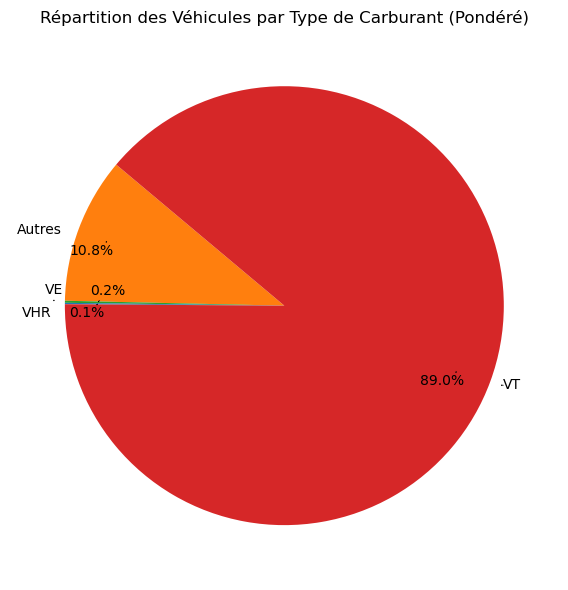

In [40]:
# Définition des couleurs
couleurs = {
    "VHR": "#1f77b4",    # Bleu
    "VT": "#d62728",     # Rouge
    "VE": "#2ca02c",     # Vert
    "Autres": "#ff7f0e"  # Orange
}

# Compter les effectifs pondérés
frequences_ponderees = df_voit.groupby("energie_groupe")["pond_veh"].sum()

# Création du graphique
plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(
    frequences_ponderees, 
    colors=[couleurs[c] for c in frequences_ponderees.index],
    labels=frequences_ponderees.index, 
    autopct='%1.1f%%',  # Affiche tous les % 
    startangle=140, 
    pctdistance=0.85,  # Éloigne les % du centre
    labeldistance=1.05,  # Éloigne les labels 
)

# Ajustement des textes pour éviter le chevauchement
texts.extend(autotexts)  # Inclure les labels et pourcentages
adjust_text(texts, only_move={'points': 'y', 'text': 'y'}, arrowprops=dict(arrowstyle="->", color='black', lw=0.5))

plt.title("Répartition des Véhicules par Type de Carburant (Pondéré)")
plt.tight_layout()
plt.show()


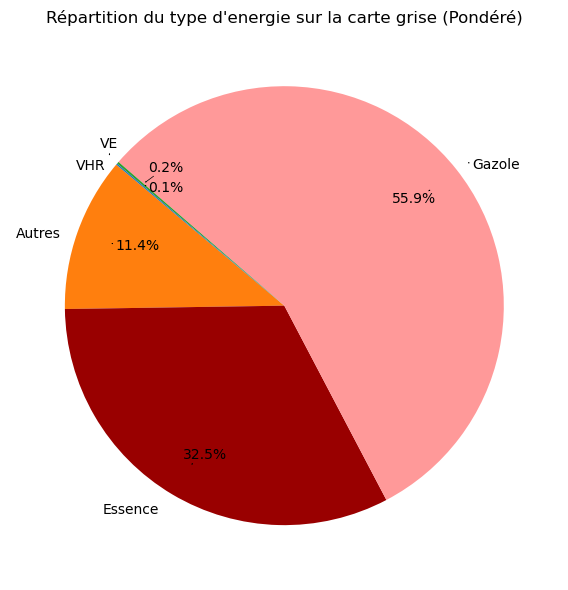

In [41]:
# Définition des couleurs
couleurs = {
    "VHR": "#1f77b4",    # Bleu
    "Gazole": "#ff9999",     # Rouge clair
    "Essence": "#990000", #Rouge foncé
    "VE": "#2ca02c",     # Vert
    "Autres": "#ff7f0e"  # Orange
}

# Compter les effectifs pondérés
frequences_ponderees = df_voit.groupby("energie_cartegrise")["pond_veh"].sum()

# Création du graphique
plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(
    frequences_ponderees, 
    colors=[couleurs[c] for c in frequences_ponderees.index],
    labels=frequences_ponderees.index, 
    autopct='%1.1f%%',  # Affiche tous les % 
    startangle=140, 
    pctdistance=0.85,  # Éloigne les % du centre
    labeldistance=1.05,  # Éloigne les labels 
)

# Ajustement des textes pour éviter le chevauchement
texts.extend(autotexts)  # Inclure les labels et pourcentages
adjust_text(texts, only_move={'points': 'y', 'text': 'y'}, arrowprops=dict(arrowstyle="->", color='black', lw=0.5))

plt.title("Répartition du type d'energie sur la carte grise (Pondéré)")
plt.tight_layout()
plt.show()

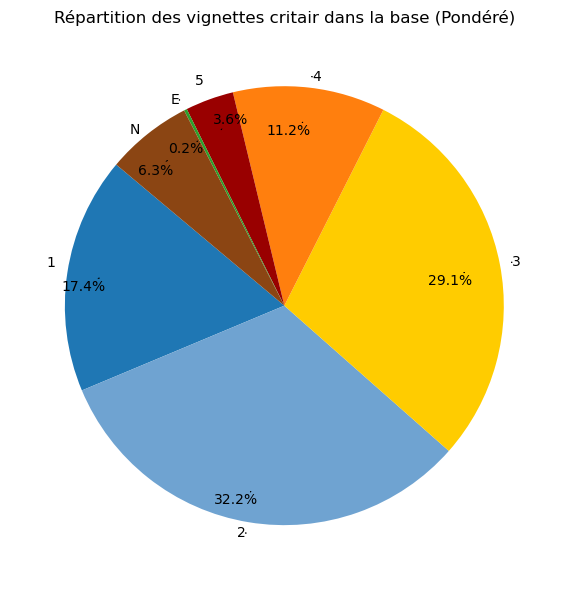

In [42]:
couleurs_critair = {
    "E": "#2ca02c",   # Vert pour Électrique
    "1": "#1f77b4",   # Bleu (Crit'Air 1)
    "2": "#6fa3d1",   # Bleu clair (Crit'Air 2)
    "3": "#ffcc00",   # Jaune (Crit'Air 3)
    "4": "#ff7f0e",   # Orange (Crit'Air 4)
    "5": "#990000",   # Rouge foncé (Crit'Air 5)
    "N": "#8B4513"    # Marron (Non classé)
}

# Compter les fréquences de chaque crit'air
frequences_ponderees = df_voit.groupby("critair")["pond_veh"].sum()
frequences_ponderees = frequences_ponderees.sort_index()

# Création du graphique
plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(
    frequences_ponderees, 
    colors=[couleurs_critair[c] for c in frequences_ponderees.index],
    labels=frequences_ponderees.index, 
    autopct='%1.1f%%',  # Affiche tous les % 
    startangle=140, 
    pctdistance=0.85,  # Éloigne les % du centre
    labeldistance=1.05,  # Éloigne les labels 
)

# Ajustement des textes pour éviter le chevauchement
texts.extend(autotexts)  # Inclure les labels et pourcentages
adjust_text(texts, only_move={'points': 'y', 'text': 'y'}, arrowprops=dict(arrowstyle="->", color='black', lw=0.5))

plt.title("Répartition des vignettes critair dans la base (Pondéré)")
plt.tight_layout()
plt.show()

Après avoir présenter les caractéristiques générales des véhicules, on veut essayer de relier le kilométrage avec les caractéristiques des vehicules (energie, critair, cartegrise...)

In [43]:
#Stats descriptives du km annuel selon le carburant du vehicule
stats_km_quantiles = df_voit.groupby("energie_groupe")["KVKM1ANV"].agg(['count', 'mean', 'std', 'min', 
                                                            lambda x: x.quantile(0.01), 
                                                            'median', 
                                                            lambda x: x.quantile(0.99), 
                                                            'max'])

# Renommer les colonnes pour plus de clarté
stats_km_quantiles.columns = ['count', 'mean', 'std', 'min', '1%', 'median', '99%', 'max']

print(stats_km_quantiles)


                count          mean          std          min           1%  \
energie_groupe                                                               
Autres           1710  10150.962422  9057.512830     0.000000   152.700000   
VE                 30   8261.050310  2466.703777  1044.859917  1602.203829   
VHR                21  14441.080114  6819.677767  1316.105769  2295.784615   
VT              16711  11376.966409  8015.989859     0.000000   379.905466   

                      median           99%            max  
energie_groupe                                             
Autres           8000.000000  45000.000000   65000.000000  
VE               9423.828432  11363.060367   12000.000000  
VHR             15920.021346  29093.155157   29321.666667  
VT              10644.418605  33616.795899  151260.830720  


In [44]:
import numpy as np

def weighted_mean(x, weights):
    """Moyenne pondérée en ignorant les NaN"""
    mask = ~np.isnan(x)
    return np.average(x[mask], weights=weights[mask]) if np.any(mask) else np.nan

def weighted_std(x, weights):
    """Écart-type pondéré"""
    mask = ~np.isnan(x)
    if np.any(mask):
        avg = np.average(x[mask], weights=weights[mask])
        variance = np.average((x[mask] - avg) ** 2, weights=weights[mask])
        return np.sqrt(variance)
    return np.nan

def weighted_quantile(x, weights, quantile):
    """Quantile pondéré"""
    mask = ~np.isnan(x)
    x, weights = x[mask], weights[mask]
    if len(x) == 0:
        return np.nan
    sorted_indices = np.argsort(x)
    x_sorted, weights_sorted = x[sorted_indices], weights[sorted_indices]
    cumulative_weights = np.cumsum(weights_sorted) / np.sum(weights_sorted)
    return x_sorted[np.searchsorted(cumulative_weights, quantile)]

# Exclure les NaN avant l'agrégation
df_filtered = df_voit.dropna(subset=["KVKM1ANV"])

# Calcul des statistiques pondérées par énergie
stats_km_pond = df_filtered.groupby("energie_groupe").apply(lambda g: pd.Series({
    'count': len(g),  
    'mean': weighted_mean(g["KVKM1ANV"].values, g["pond_veh"].values),
    'std': weighted_std(g["KVKM1ANV"].values, g["pond_veh"].values),
    'min': np.min(g["KVKM1ANV"].values),
    '1%': weighted_quantile(g["KVKM1ANV"].values, g["pond_veh"].values, 0.01),
    'median': weighted_quantile(g["KVKM1ANV"].values, g["pond_veh"].values, 0.50),
    '99%': weighted_quantile(g["KVKM1ANV"].values, g["pond_veh"].values, 0.99),
    'max': np.max(g["KVKM1ANV"].values)
}))

print(stats_km_pond)


                  count          mean          std          min           1%  \
energie_groupe                                                                 
Autres           1710.0   9971.705140  9145.881597     0.000000   150.000000   
VE                 30.0   7940.334665  2832.607984  1044.859917  1044.859917   
VHR                21.0  14513.749243  6431.139293  1316.105769  1316.105769   
VT              16711.0  11361.820558  7998.503476     0.000000   379.504170   

                      median           99%            max  
energie_groupe                                             
Autres           8000.000000  50000.000000   65000.000000  
VE               9423.828432  12000.000000   12000.000000  
VHR             15920.021346  29321.666667   29321.666667  
VT              10624.365172  34338.467967  151260.830720  


/tmp/ipykernel_9949/1477030897.py:32: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stats_km_pond = df_filtered.groupby("energie_groupe").apply(lambda g: pd.Series({


In [45]:
import numpy as np

def weighted_mean(x, weights):
    """Moyenne pondérée en ignorant les NaN"""
    mask = ~np.isnan(x)
    return np.average(x[mask], weights=weights[mask]) if np.any(mask) else np.nan

def weighted_std(x, weights):
    """Écart-type pondéré"""
    mask = ~np.isnan(x)
    if np.any(mask):
        avg = np.average(x[mask], weights=weights[mask])
        variance = np.average((x[mask] - avg) ** 2, weights=weights[mask])
        return np.sqrt(variance)
    return np.nan

def weighted_quantile(x, weights, quantile):
    """Quantile pondéré"""
    mask = ~np.isnan(x)
    x, weights = x[mask], weights[mask]
    if len(x) == 0:
        return np.nan
    sorted_indices = np.argsort(x)
    x_sorted, weights_sorted = x[sorted_indices], weights[sorted_indices]
    cumulative_weights = np.cumsum(weights_sorted) / np.sum(weights_sorted)
    return x_sorted[np.searchsorted(cumulative_weights, quantile)]

# Exclure les NaN avant l'agrégation
df_filtered = df_voit.dropna(subset=["KVKM1ANV"])

# Calcul des statistiques pondérées par énergie
stats_km_pond = df_filtered.groupby("critair").apply(lambda g: pd.Series({
    'count': len(g),  
    'mean': weighted_mean(g["KVKM1ANV"].values, g["pond_veh"].values),
    'std': weighted_std(g["KVKM1ANV"].values, g["pond_veh"].values),
    'min': np.min(g["KVKM1ANV"].values),
    '1%': weighted_quantile(g["KVKM1ANV"].values, g["pond_veh"].values, 0.01),
    'median': weighted_quantile(g["KVKM1ANV"].values, g["pond_veh"].values, 0.50),
    '99%': weighted_quantile(g["KVKM1ANV"].values, g["pond_veh"].values, 0.99),
    'max': np.max(g["KVKM1ANV"].values)
}))

print(stats_km_pond)
stats_km_pond.to_csv("/home/onyxia/work/Statapp/Bases/stats_km_pond.csv", index="True")


          count          mean          std         min          1%  \
critair                                                              
1        3044.0  10046.158456  6061.342129   41.671252  687.982981   
2        5822.0  14547.724925  8364.035501    0.476185  856.861284   
3        5145.0  10525.572470  7513.850144    5.000000  453.751562   
4        2015.0  10059.248384  8498.151984   10.000000  547.948786   
5         652.0   8322.189375  5957.181352    4.874301  200.000000   
E          39.0   7407.792079  3208.967200  700.000000  700.000000   
N        1170.0   5690.699681  7957.707258    0.000000   31.935362   

               median           99%           max  
critair                                            
1        10983.476300  27215.379276  139779.40826  
2        14349.533279  39691.125058  112359.53988  
3         9312.742818  32523.605769  148756.78954  
4         8877.103175  30000.000000  151260.83072  
5         7473.173441  26801.668820   50000.00000  
E    

/tmp/ipykernel_9949/3639165549.py:32: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stats_km_pond = df_filtered.groupby("critair").apply(lambda g: pd.Series({


    2.2 Analyse de la base tcm_men : 

In [46]:
#Affiche table tcm_menage
print(df_tcmmen.head())

       ident_men     ident_log  vague_enq  BS    pond_menC  NPERS  NCOUPLES  \
0  1100000114000  110000011400          1   0  1842.977077      1         0   
1  1100000115000  110000011500          1   0  1948.382441      4         1   
2  1100000116000  110000011600          1   0   833.453670      2         1   
3  1100000124000  110000012400          2   0  1698.142782      2         1   
4  1100000125000  110000012500          2   0  1994.633496      2         1   

   NENFANTS  NACTIFS  NENFACT  ...  pop_10min_pieton_train_res  \
0         0        0        0  ...                          80   
1         2        2        0  ...                          80   
2         0        0        0  ...                           0   
3         0        2        0  ...                          50   
4         0        1        0  ...                          50   

   pop_10min_voiture_tram_metro_res  pop_10min_voiture_train_res  \
0                                 0                         

In [47]:
#Convertir les variables identifiants voitures et ménages en string
df_tcmmen[["ident_log", "ident_men"]] = df_tcmmen[["ident_log", "ident_men"]].astype(str)


In [48]:
#Vérifier que la somme des pondérations des ménages vaut le nombre total de ménages en France
tot_pond_menC=df_tcmmen[["pond_menC"]].sum()
print(tot_pond_menC)

#Nombre moyen de personnes dans un ménage
moy_NPERS=df_tcmmen[["NPERS"]].mean()
print(moy_NPERS)


pond_menC    2.925310e+07
dtype: float64
NPERS    2.292007
dtype: float64


In [49]:
#Type de ménage au sens du TCM : "TYPMEN5",
#Diplôme le plus élevé de la PR (code regroupé) : "DIPDETPR",
#Catégorie socioprofessionnelle du ménage : "CSMEN",
#Département de résidence : "DEP_RES",
#Région de la commune de résidence : "REG_res"
#variables de localisation...

nom_col_quanti=["quartile_rev","decile_rev"]

for col in nom_col_quanti :
    print("Résumé statistique pour la variable", col)
    print(df_tcmmen[col].describe())
    
print(df_tcmmen["quartile_rev"].head())


Résumé statistique pour la variable quartile_rev
count    13825.000000
mean         2.612658
std          1.115079
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          4.000000
Name: quartile_rev, dtype: float64
Résumé statistique pour la variable decile_rev
count    13825.000000
mean         5.750741
std          2.872370
min          1.000000
25%          3.000000
50%          6.000000
75%          8.000000
max         10.000000
Name: decile_rev, dtype: float64
0    3
1    4
2    2
3    4
4    3
Name: quartile_rev, dtype: int64


In [50]:
#Type de ménage au sens du TCM : "TYPMEN5",
#Diplôme le plus élevé de la PR (code regroupé) : "DIPDETPR",
#Catégorie socioprofessionnelle du ménage : "CSMEN",
#Département de résidence : "DEP_RES",
#Région de la commune de résidence : "REG_res"
#Statut dans l'unité urbaine (banlieu, ville centre, etc.) : "STATUTCOM_UU_RES"
#Degré de densité : DENSITECOM_RES
#Distance à vol d'oiseau du domicile à la station la plus proche de métro : "dist_res_metro"
#Distance à vol d'oiseau du domicile à la station la plus proche de tramway : "dist_res_tram"
#Distance à vol d'oiseau du domicile à la gare la plus proche : "dist_res_train"
#Distance à vol d'oiseau du domicile à la gare TGV la plus proche : "dist_res_tgv"

#variables quantitatives
#Part de la population de la commune à moins de 10 min à pied d'une station de métro ou de : "trampop_10min_pieton_tram_metro_res"
#Idem pour station de train (TER, RER et grande ligne) : "pop_10min_pieton_train_res"
#Part de la population de la commune à moins de 10 min en voiture d'une station de métro ou de : "pop_10min_voiture_tram_metro_res"
#Idem pour station de train (TER, RER et grande ligne) : "pop_10min_voiture_train_res"

In [51]:
nom_col_quanti=["pop_10min_pieton_tram_metro_res",
"pop_10min_pieton_train_res",
"pop_10min_voiture_tram_metro_res",
"pop_10min_voiture_train_res"]

for col in nom_col_quanti :
    print("Résumé statistique pour la variable", col)
    print(df_tcmmen[col].describe(percentiles=[0.01, 0.25, 0.5, 0.75, 0.99]))


Résumé statistique pour la variable pop_10min_pieton_tram_metro_res
count    13825.000000
mean        13.696203
std         28.978965
min          0.000000
1%           0.000000
25%          0.000000
50%          0.000000
75%          0.000000
99%        100.000000
max        100.000000
Name: pop_10min_pieton_tram_metro_res, dtype: float64
Résumé statistique pour la variable pop_10min_pieton_train_res
count    13825.000000
mean        12.266908
std         17.671848
min          0.000000
1%           0.000000
25%          0.000000
50%          0.000000
75%         20.000000
99%         70.000000
max        100.000000
Name: pop_10min_pieton_train_res, dtype: float64
Résumé statistique pour la variable pop_10min_voiture_tram_metro_res
count    13825.000000
mean        30.286438
std         45.285445
min          0.000000
1%           0.000000
25%          0.000000
50%          0.000000
75%        100.000000
99%        100.000000
max        100.000000
Name: pop_10min_voiture_tram_metro_re

In [52]:
#Stats descriptives de la part de la population à moins de 10km des infrastructures de transport selon le statut dans l'unité urbaine 
for col in nom_col_quanti :
    stats_part_pop = df_tcmmen.groupby("STATUTCOM_UU_RES")[col].agg(['count', 'mean', 'std', 'min', 
                                                            lambda x: x.quantile(0.01), 
                                                            'median', 
                                                            lambda x: x.quantile(0.99), 
                                                            'max'])

    # Renommer les colonnes pour plus de clarté
    stats_part_pop.columns = ['count', 'mean', 'std', 'min', '1%', 'median', '99%', 'max']
    stats_part_pop.rename(index = {'B' : 'Banlieue', 'C' : 'Ville-centre', 'H' : 'Hors unité urbaine', 'I' : 'Ville isolée'}, inplace = True)
    print("Résumé stat de la variable", col, "selon le statut dans l'unité urbaine")
    print(stats_part_pop)         

Résumé stat de la variable pop_10min_pieton_tram_metro_res selon le statut dans l'unité urbaine
                    count       mean        std  min   1%  median    99%  max
STATUTCOM_UU_RES                                                             
Banlieue             4946  12.090578  24.865191    0  0.0     0.0   90.0  100
Ville-centre         4587  28.242860  38.402570    0  0.0     0.0  100.0  100
Hors unité urbaine   3314   0.000000   0.000000    0  0.0     0.0    0.0    0
Ville isolée          978   0.000000   0.000000    0  0.0     0.0    0.0    0
Résumé stat de la variable pop_10min_pieton_train_res selon le statut dans l'unité urbaine
                    count       mean        std  min   1%  median   99%  max
STATUTCOM_UU_RES                                                            
Banlieue             4946  15.564092  20.838229    0  0.0     0.0  70.0  100
Ville-centre         4587  17.856987  16.129073    0  0.0    10.0  70.0   90
Hors unité urbaine   3314   1.276403 

Résumé stat de la variable pop_10min_voiture_tram_metro_res selon le statut dans l'unité urbaine
                    count       mean        std  min   1%  median    99%  max
STATUTCOM_UU_RES                                                             
Banlieue             4946  46.366761  48.669270    0  0.0     0.0  100.0  100
Ville-centre         4587  39.590146  48.747571    0  0.0     0.0  100.0  100
Hors unité urbaine   3314   1.472541  10.966211    0  0.0     0.0   80.0  100
Ville isolée          978   2.965235  13.686085    0  0.0     0.0   69.2  100
Résumé stat de la variable pop_10min_voiture_train_res selon le statut dans l'unité urbaine
                    count       mean        std  min   1%  median    99%  max
STATUTCOM_UU_RES                                                             
Banlieue             4946  90.885564  26.125315    0  0.0   100.0  100.0  100
Ville-centre         4587  90.673643  27.894647    0  0.0   100.0  100.0  100
Hors unité urbaine   3314  36.3

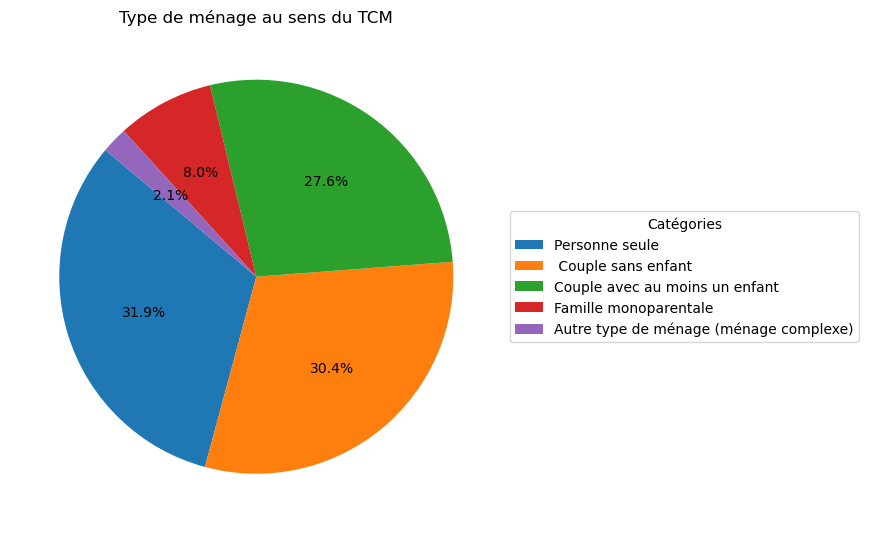

In [53]:
#Type de ménage au sens du TCM : "TYPMEN5",



# Compter les fréquences de chaque type d'énergie
frequences = df_tcmmen["TYPMEN5"].value_counts()

# Créer le camembert sans les étiquettes (labels)
plt.figure(figsize=(8, 6))
plt.pie(frequences, autopct='%1.1f%%', startangle=140)

# Ajouter la légende à côté
frequences.rename(index = {1 : 'Personne seule', 2 : 'Famille monoparentale ', 3 : ' Couple sans enfant', 4 : 'Couple avec au moins un enfant', 5 :'Autre type de ménage (ménage complexe)' }, inplace = True)
plt.legend(frequences.index, title="Catégories", loc="center left", bbox_to_anchor=(1, 0.5))
plt.title("Type de ménage au sens du TCM")
plt.tight_layout()  # Ajuste automatiquement l'espace pour éviter les chevauchements
plt.show()


/tmp/ipykernel_9949/3315400462.py:12: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # Ajuste automatiquement l'espace pour éviter les chevauchements
/tmp/ipykernel_9949/3315400462.py:12: UserWarning: Glyph 151 (\x97) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # Ajuste automatiquement l'espace pour éviter les chevauchements
/opt/conda/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 151 (\x97) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


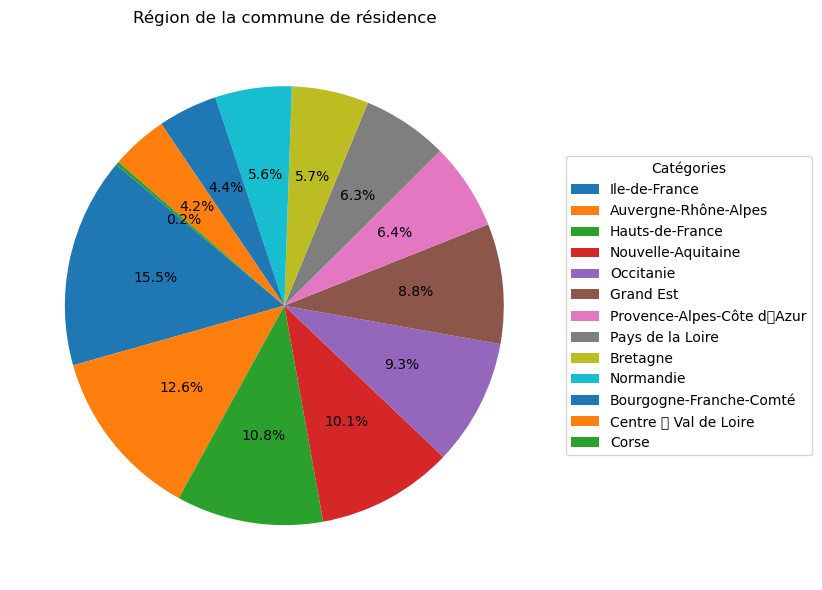

In [54]:
#Région de la commune de résidence : "REG_res"
frequences = df_tcmmen["REG_res"].value_counts()

# Créer le camembert sans les étiquettes (labels)
plt.figure(figsize=(8, 6))
plt.pie(frequences, autopct='%1.1f%%', startangle=140)

# Ajouter la légende à côté
plt.legend(frequences.index, title="Catégories", loc="center left", bbox_to_anchor=(1, 0.5))

plt.title("Région de la commune de résidence")
plt.tight_layout()  # Ajuste automatiquement l'espace pour éviter les chevauchements
plt.show()

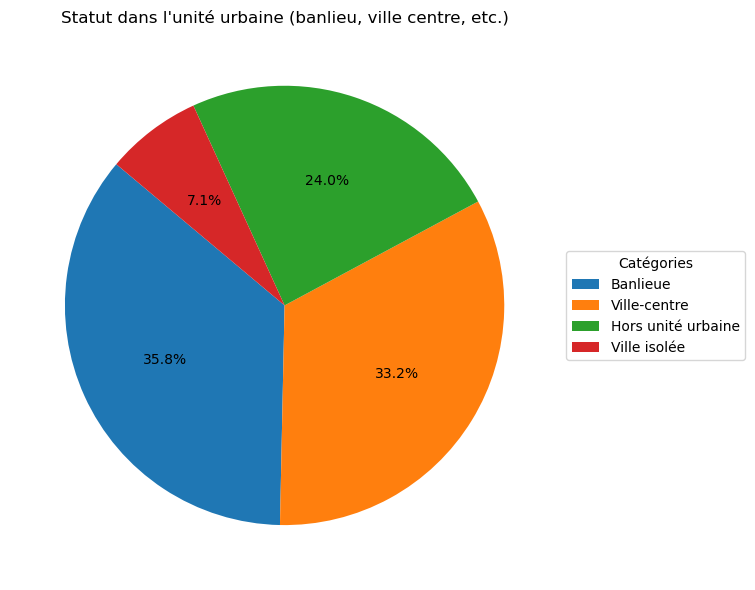

In [55]:
#Statut dans l'unité urbaine (banlieu, ville centre, etc.) : "STATUTCOM_UU_RES"
frequences = df_tcmmen["STATUTCOM_UU_RES"].value_counts()

# Créer le camembert sans les étiquettes (labels)
plt.figure(figsize=(8, 6))
plt.pie(frequences, autopct='%1.1f%%', startangle=140)

# Ajouter la légende à côté
frequences.rename(index = {'B' : 'Banlieue', 'C' : 'Ville-centre', 'H' : 'Hors unité urbaine', 'I' : 'Ville isolée'}, inplace = True)
plt.legend(frequences.index, title="Catégories", loc="center left", bbox_to_anchor=(1, 0.5))
plt.title("Statut dans l'unité urbaine (banlieu, ville centre, etc.)")
plt.tight_layout()  # Ajuste automatiquement l'espace pour éviter les chevauchements
plt.show()

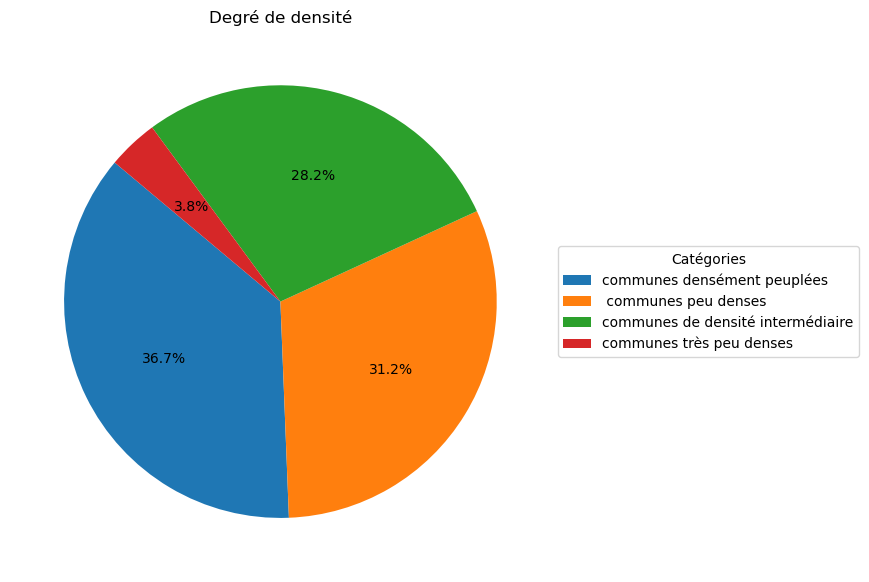

In [56]:
#Degré de densité : DENSITECOM_RES
frequences = df_tcmmen["DENSITECOM_RES"].value_counts()

# Créer le camembert sans les étiquettes (labels)
plt.figure(figsize=(8, 6))
plt.pie(frequences, autopct='%1.1f%%', startangle=140)

# Ajouter la légende à côté
frequences.rename(index = {1 : 'communes densément peuplées', 2 : 'communes de densité intermédiaire', 3 : ' communes peu denses', 4 : 'communes très peu denses'}, inplace = True)
plt.legend(frequences.index, title="Catégories", loc="center left", bbox_to_anchor=(1, 0.5))
plt.title("Degré de densité")
plt.tight_layout()  # Ajuste automatiquement l'espace pour éviter les chevauchements
plt.show()


    2.3 Analyse de la base men : 

In [57]:
#On affiche la base et on regarde les variables contenus par celle-ci

print(df_men.head())
print(df_men.columns)

#On passe la variable identifiant menage en str
df_men[["IDENT_MEN"]] = df_men[["IDENT_MEN"]].astype(str)

       IDENT_MEN    pond_menC  JNBVEH  JNBVHS  JNBVPHS  JNBCCHS  JNBVULHS  \
0  1100000114000  1842.977077       1     2.0      NaN      NaN       NaN   
1  1100000115000  1948.382441       2     2.0      NaN      NaN       NaN   
2  1100000116000   833.453670       1     2.0      NaN      NaN       NaN   
3  1100000124000  1698.142782       1     2.0      NaN      NaN       NaN   
4  1100000125000  1994.633496       2     2.0      NaN      NaN       NaN   

   JNBMOTO  JNBCYCLO  JNBAUTVEH  ...  JUTILMOTO  JUTILCYCLO  JUTILAUTVEH  \
0        0         0          0  ...        NaN         NaN          NaN   
1        0         0          0  ...        NaN         NaN          NaN   
2        0         0          0  ...        NaN         NaN          NaN   
3        2         0          0  ...        2.0         NaN          NaN   
4        0         0          0  ...        NaN         NaN          NaN   

   JUTILVELOAD  JUTILVELOENF  JVOLVELO  JPLUSVELO  JNBKVM  JUTIL2RM  BLOGDIST  


In [58]:
#Part de la population ayant une voiture


3. Fusion des bases voitvul et tcm_men pour expliquer le KM des voitures selon les caractéristiques des ménages

In [59]:
#Fusion des bases voitvul et tcmmen
df_fusion = pd.merge(df_voit, df_tcmmen, left_on="IDENT_MEN", right_on="ident_men", how="left")
df_fusion.head()


,IDENT_NUMVEH,IDENT_MEN,NUM_VEH,pond_veh,KVROUL,cylindree_fin,energie_fin,energie_agrege,hybride,energie_statinfo,...,pop_10min_pieton_train_res,pop_10min_voiture_tram_metro_res,pop_10min_voiture_train_res,classement_littoral_res,classement_montagne_res,densite_7_RES,dist_res_tram,dist_res_metro,dist_res_train,dist_res_tgv
0,110000011400001,1100000114000,1,1842.977077,1,1.6,ES,1.0,NaN,2.0,...,80,0,100,Non concerné,Non concerné,Grands centres urbains,10km et plus,10km et plus,500m Ã moins de 1km,20km et plus
1,110000011500001,1100000115000,1,1948.382441,1,1.6,GO,2.0,NaN,4.0,...,80,0,100,Non concerné,Non concerné,Grands centres urbains,10km et plus,10km et plus,Moins de 500m,20km et plus
2,110000011500002,1100000115000,2,1948.382441,1,1.4,ES,1.0,NaN,2.0,...,80,0,100,Non concerné,Non concerné,Grands centres urbains,10km et plus,10km et plus,Moins de 500m,20km et plus
3,110000011600001,1100000116000,1,833.453670,1,1.6,ES,1.0,NaN,2.0,...,0,0,100,Non concerné,Non concerné,Rural Ã habitat dispersÃ©,10km et plus,10km et plus,1 Ã moins de 2km,10 Ã moins de 20km
4,110000012400001,1100000124000,1,1698.142782,1,1.5,GO,2.0,NaN,4.0,...,50,0,100,Non concerné,Non concerné,Grands centres urbains,10km et plus,10km et plus,500m Ã moins de 1km,20km et plus


In [60]:
df_voit1 = pd.read_csv("../Bases/q_voitvul_public_V3.csv", delimiter=";",encoding="ISO-8859-1", na_values=[""])  # Modifie le délimiteur si nécessaire
df_tcmmen1 = pd.read_csv("../Bases/tcm_men_public_V3.csv", delimiter=",",encoding="ISO-8859-1", na_values=[""], low_memory=False)  # Modifie le délimiteur si nécessaire
df_men = pd.read_csv("../Bases/q_menage_public_V3.csv", delimiter=";",encoding="ISO-8859-1")  # Modifie le délimiteur si nécessaire


In [61]:
df_voit1["energie_groupe"] = df_voit1["energie_statinfo"].apply(lambda x: 
                                           "VT" if x in [2, 3, 4, 5] else 
                                           "VE" if x == 1  else 
                                           "VHR" if x == 6 else 
                                           "Autres")


In [64]:
df_fusion1 = pd.merge(df_voit1, df_tcmmen1, left_on="IDENT_MEN", right_on="ident_men", how="left")
df_fusion1.head()

,IDENT_NUMVEH,IDENT_MEN,NUM_VEH,pond_veh,KVROUL,cylindree_fin,energie_fin,energie_agrege,hybride,energie_statinfo,...,pop_10min_pieton_train_res,pop_10min_voiture_tram_metro_res,pop_10min_voiture_train_res,classement_littoral_res,classement_montagne_res,densite_7_RES,dist_res_tram,dist_res_metro,dist_res_train,dist_res_tgv
0,110000011400001,1100000114000,1,1842.977077,1,1.6,ES,1.0,NaN,2.0,...,80,0,100,Non concerné,Non concerné,Grands centres urbains,10km et plus,10km et plus,500m Ã moins de 1km,20km et plus
1,110000011500001,1100000115000,1,1948.382441,1,1.6,GO,2.0,NaN,4.0,...,80,0,100,Non concerné,Non concerné,Grands centres urbains,10km et plus,10km et plus,Moins de 500m,20km et plus
2,110000011500002,1100000115000,2,1948.382441,1,1.4,ES,1.0,NaN,2.0,...,80,0,100,Non concerné,Non concerné,Grands centres urbains,10km et plus,10km et plus,Moins de 500m,20km et plus
3,110000011600001,1100000116000,1,833.453670,1,1.6,ES,1.0,NaN,2.0,...,0,0,100,Non concerné,Non concerné,Rural Ã habitat dispersÃ©,10km et plus,10km et plus,1 Ã moins de 2km,10 Ã moins de 20km
4,110000012400001,1100000124000,1,1698.142782,1,1.5,GO,2.0,NaN,4.0,...,50,0,100,Non concerné,Non concerné,Grands centres urbains,10km et plus,10km et plus,500m Ã moins de 1km,20km et plus


In [29]:
df_fusion1["energie_groupe"].value_counts()

energie_groupe
VT        16722
Autres     2044
VE           30
VHR          21
Name: count, dtype: int64

/opt/conda/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 151 (\x97) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


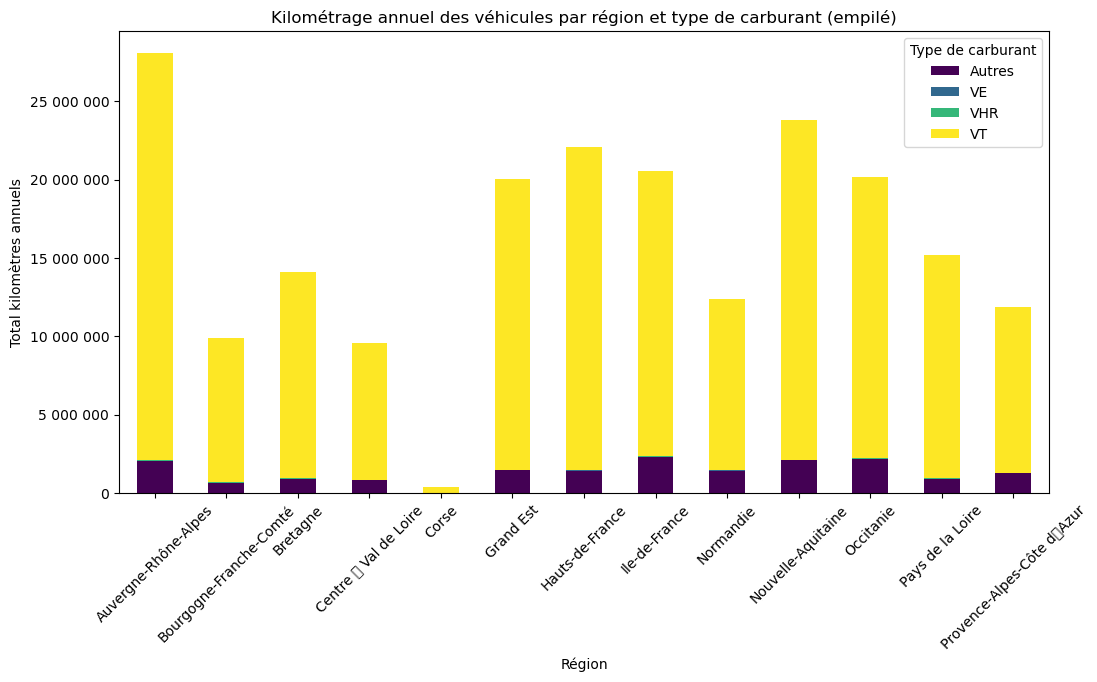

In [30]:
import pandas as pd
import matplotlib.pyplot as plt


# 🔹 Supprimer les valeurs manquantes
df_fusion1 = df_fusion1.dropna(subset=['KVKM1ANV', 'REG_res', 'energie_groupe'])

# 🔄 Conversion en types appropriés
df_fusion1['KVKM1ANV'] = pd.to_numeric(df_fusion1['KVKM1ANV'], errors='coerce')  # Assurer un type numérique
df_fusion1['REG_res'] = df_fusion1['REG_res'].astype(str)  # Convertir REG_res en texte
df_fusion1['energie_groupe'] = df_fusion1['energie_groupe'].astype(str)  # Convertir energie_groupe en texte

# 📊 Regrouper les données : Somme des kilomètres par région et type de carburant
df_grouped = df_fusion1.groupby(['REG_res', 'energie_groupe'])['KVKM1ANV'].sum().unstack()

# 🎨 Création du diagramme en barres empilées
fig, ax = plt.subplots(figsize=(12, 6))
df_grouped.plot(kind='bar', stacked=True, colormap="viridis", ax=ax)

# 🏷️ Ajout des labels et du titre
plt.xlabel("Région")
plt.ylabel("Total kilomètres annuels")
plt.title("Kilométrage annuel des véhicules par région et type de carburant (empilé)")
plt.xticks(rotation=45)
plt.legend(title="Type de carburant")

# 📏 Mettre l’axe Y en notation standard (sans 1E7)
ax.ticklabel_format(style='plain', axis='y')  # Désactive la notation scientifique
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', ' ')))  # Ajoute des espaces pour la lisibilité

# 🔄 Affichage du graphique
plt.show()


/opt/conda/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 151 (\x97) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


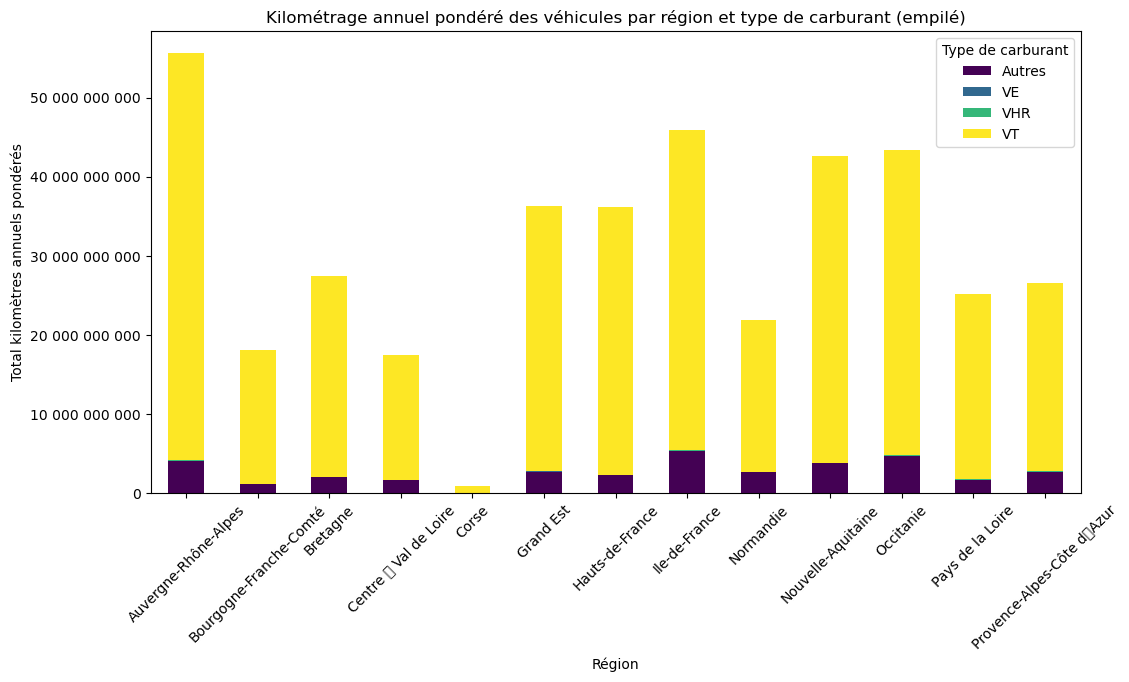

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# 🔹 Supprimer les valeurs manquantes
df_fusion1 = df_fusion1.dropna(subset=['KVKM1ANV', 'REG_res', 'energie_groupe', 'pond_veh'])

# 🔄 Conversion en types appropriés
df_fusion1['KVKM1ANV'] = pd.to_numeric(df_fusion1['KVKM1ANV'], errors='coerce')  # Assurer un type numérique
df_fusion1['pond_veh'] = pd.to_numeric(df_fusion1['pond_veh'], errors='coerce')  # Assurer que la pondération est bien numérique
df_fusion1['REG_res'] = df_fusion1['REG_res'].astype(str)  # Convertir REG_res en texte
df_fusion1['energie_groupe'] = df_fusion1['energie_groupe'].astype(str)  # Convertir energie_groupe en texte

# 📊 Calcul du kilométrage pondéré
df_fusion1['KM_pondéré'] = df_fusion1['KVKM1ANV'] * df_fusion1['pond_veh']

# 📊 Regrouper les données : Somme des kilomètres pondérés par région et type de carburant
df_grouped = df_fusion1.groupby(['REG_res', 'energie_groupe'])['KM_pondéré'].sum().unstack()

# 🎨 Création du diagramme en barres empilées
fig, ax = plt.subplots(figsize=(12, 6))
df_grouped.plot(kind='bar', stacked=True, colormap="viridis", ax=ax)

# 🏷️ Ajout des labels et du titre
plt.xlabel("Région")
plt.ylabel("Total kilomètres annuels pondérés")
plt.title("Kilométrage annuel pondéré des véhicules par région et type de carburant (empilé)")
plt.xticks(rotation=45)
plt.legend(title="Type de carburant")

# 📏 Mettre l’axe Y en notation standard (sans 1E7)
ax.ticklabel_format(style='plain', axis='y')  # Désactive la notation scientifique
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', ' ')))  # Ajoute des espaces pour la lisibilité

# 🔄 Affichage du graphique
plt.show()


/opt/conda/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 151 (\x97) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


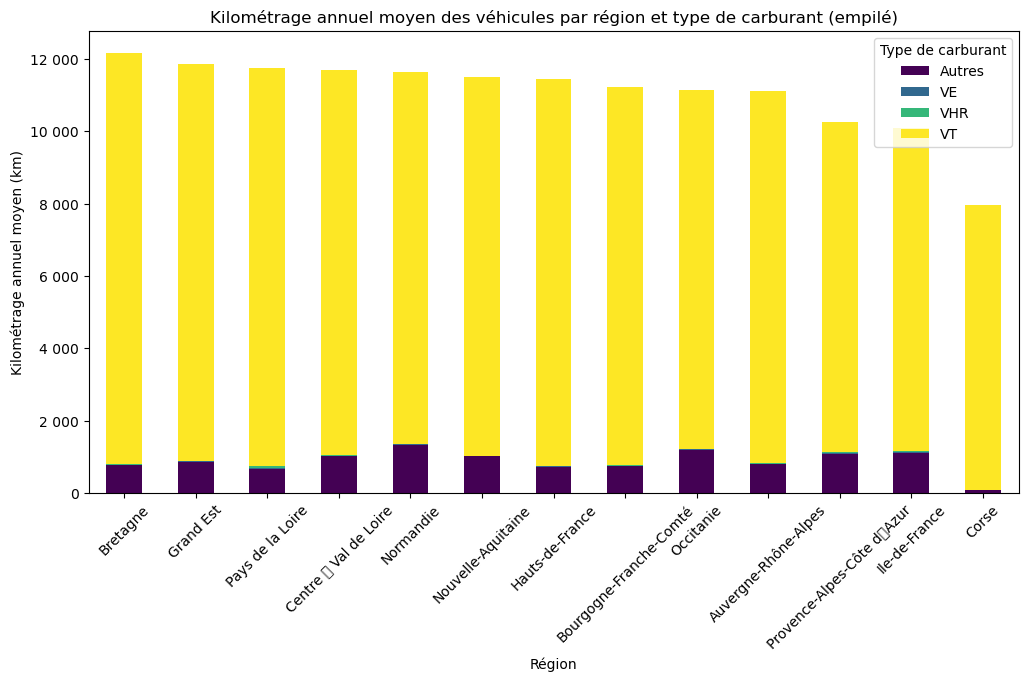

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# 🔹 Supprimer les valeurs manquantes
df_fusion1 = df_fusion1.dropna(subset=['KVKM1ANV', 'REG_res', 'energie_groupe'])

# 🔄 Conversion en types appropriés
df_fusion1['KVKM1ANV'] = pd.to_numeric(df_fusion1['KVKM1ANV'], errors='coerce')  # Assurer un type numérique
df_fusion1['REG_res'] = df_fusion1['REG_res'].astype(str)  # Convertir REG_res en texte
df_fusion1['energie_groupe'] = df_fusion1['energie_groupe'].astype(str)  # Convertir energie_groupe en texte



# 📊 Étape 1 : Calculer le total des kilomètres par région et type de carburant
km_tot_par_carburant = df_fusion1.groupby(['REG_res', 'energie_groupe'])['KVKM1ANV'].sum()

# 📊 Étape 2 : Calculer le nombre total de véhicules par région
nb_veh_par_region = df_fusion1.groupby('REG_res').size()

# 📊 Étape 3 : Calculer le km annuel moyen par type de carburant et région
df_km_moyen = (km_tot_par_carburant / nb_veh_par_region).unstack()

# 📊 Trier les régions (ex: par kilométrage total décroissant)
df_km_moyen["Total"] = df_km_moyen.sum(axis=1)
df_km_moyen = df_km_moyen.sort_values(by="Total", ascending=False).drop(columns=["Total"])

# 🎨 Création du diagramme en barres empilées
fig, ax = plt.subplots(figsize=(12, 6))
df_km_moyen.plot(kind='bar', stacked=True, colormap="viridis", ax=ax)


# 🏷️ Ajout des labels et du titre
plt.xlabel("Région")
plt.ylabel("Kilométrage annuel moyen (km)")
plt.title("Kilométrage annuel moyen des véhicules par région et type de carburant (empilé)")
plt.xticks(rotation=45)
plt.legend(title="Type de carburant")

# 📏 Mettre l’axe Y en notation standard (sans 1E7)
ax.ticklabel_format(style='plain', axis='y')  # Désactive la notation scientifique
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', ' ')))  # Ajoute des espaces pour la lisibilité

# 🔄 Affichage du graphique
plt.show()


/tmp/ipykernel_9949/316656911.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  kilometrage_moyen_par_region = df_fusion1.groupby('REG_res').apply(
/tmp/ipykernel_9949/316656911.py:26: UserWarning: Glyph 151 (\x97) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9949/316656911.py:26: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/conda/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 151 (\x97) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sa

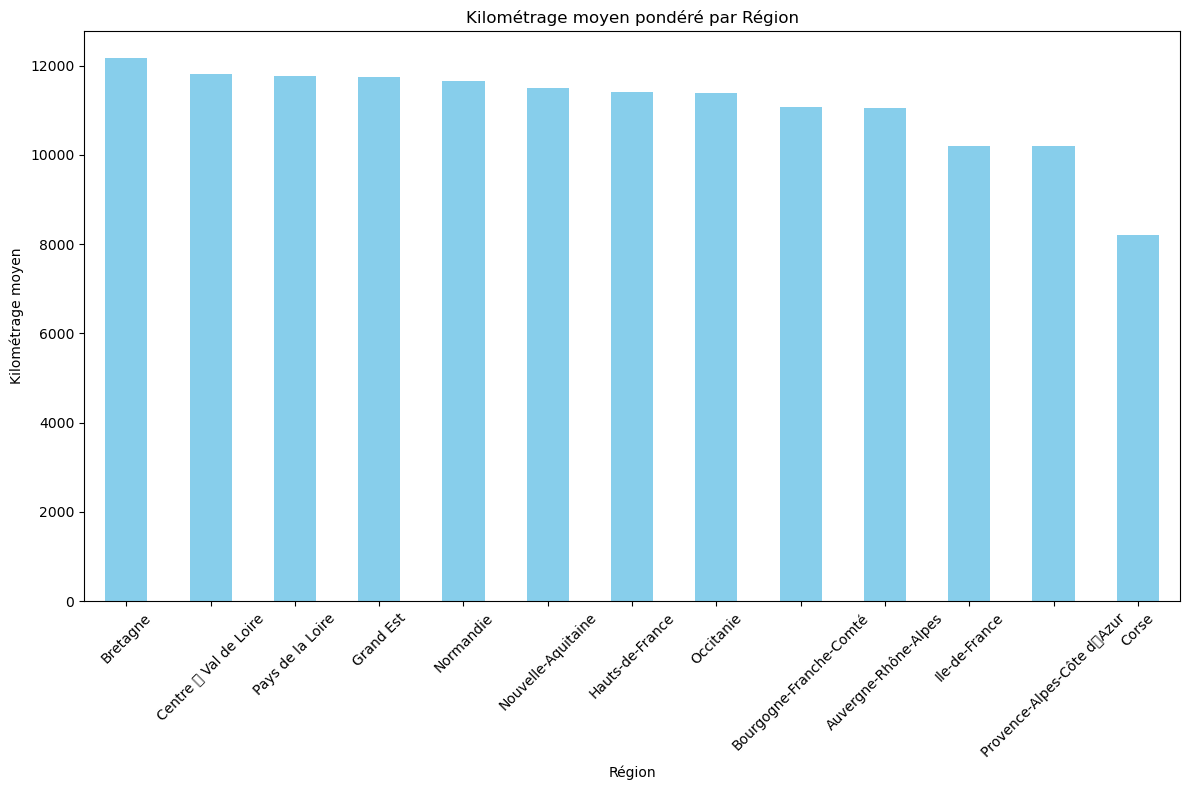

In [65]:

import pandas as pd
import matplotlib.pyplot as plt

# Supposons que df_fusion1 soit votre DataFrame

# Supprimer les valeurs manquantes
df_fusion1 = df_fusion1.dropna(subset=['KVKM1ANV', 'REG_res', 'energie_groupe'])

# Conversion en types appropriés
df_fusion1['KVKM1ANV'] = pd.to_numeric(df_fusion1['KVKM1ANV'], errors='coerce')  # Assurer un type numérique
df_fusion1['REG_res'] = df_fusion1['REG_res'].astype(str)  # Convertir REG_res en texte
df_fusion1['energie_groupe'] = df_fusion1['energie_groupe'].astype(str)  # Convertir energie_groupe en texte

# Calculer le kilométrage moyen pondéré par région
kilometrage_moyen_par_region = df_fusion1.groupby('REG_res').apply(
    lambda x: (x['KVKM1ANV'] * x['pond_veh']).sum() / x['pond_veh'].sum()
).sort_values(ascending=False)

# Tracer l'histogramme
plt.figure(figsize=(12, 8))
kilometrage_moyen_par_region.plot(kind='bar', color='skyblue')
plt.title('Kilométrage moyen pondéré par Région')
plt.ylabel('Kilométrage moyen')
plt.xlabel('Région')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipykernel_9949/596341831.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  kilometrage_moyen_total = df_fusion1.groupby('REG_res').apply(
/tmp/ipykernel_9949/596341831.py:58: UserWarning: Glyph 151 (\x97) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9949/596341831.py:58: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/conda/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 151 (\x97) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
 

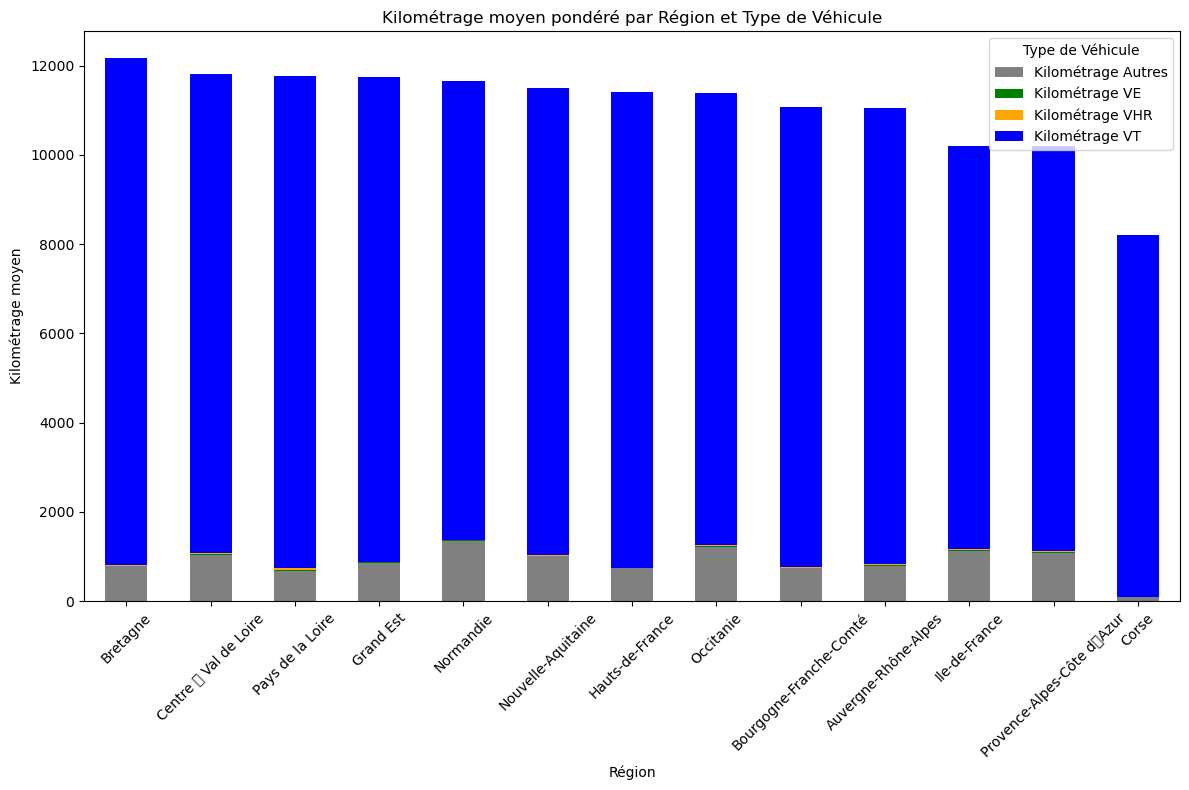

In [69]:

import pandas as pd
import matplotlib.pyplot as plt

# Supposons que df_fusion1 soit votre DataFrame

# Supprimer les valeurs manquantes
df_fusion1 = df_fusion1.dropna(subset=['KVKM1ANV', 'REG_res', 'energie_groupe'])

# Conversion en types appropriés
df_fusion1['KVKM1ANV'] = pd.to_numeric(df_fusion1['KVKM1ANV'], errors='coerce')  # Assurer un type numérique
df_fusion1['REG_res'] = df_fusion1['REG_res'].astype(str)  # Convertir REG_res en texte
df_fusion1['energie_groupe'] = df_fusion1['energie_groupe'].astype(str)  # Convertir energie_groupe en texte

# Calculer le kilométrage moyen total par région
kilometrage_moyen_total = df_fusion1.groupby('REG_res').apply(
    lambda x: (x['KVKM1ANV'] * x['pond_veh']).sum() / x['pond_veh'].sum()
)

# Calculer les sommes des kilométrages pour chaque type de véhicule
kilometrage_par_vehicule = df_fusion1.groupby(['REG_res', 'energie_groupe'])['KVKM1ANV'].sum().unstack()

# Calculer les proportions pour chaque type de véhicule
proportion_par_vehicule = kilometrage_par_vehicule.div(kilometrage_par_vehicule.sum(axis=1), axis=0)

# Calculer les contributions au kilométrage moyen total
contribution_par_vehicule = proportion_par_vehicule.multiply(kilometrage_moyen_total, axis=0)

# Créer un DataFrame pour les résultats
resultats = pd.DataFrame({
    'Région': kilometrage_moyen_total.index,
    'Kilométrage Total': kilometrage_moyen_total
})

# Ajouter les contributions de chaque type de véhicule au DataFrame
for vehicule in contribution_par_vehicule.columns:
    resultats[f'Kilométrage {vehicule}'] = contribution_par_vehicule[vehicule]

# Trier les résultats par kilométrage total décroissant
resultats = resultats.sort_values(by='Kilométrage Total', ascending=False)

# Définir une palette de couleurs personnalisée
colors = {
    'VE': 'green',
    'VHR': 'orange',
    'VT': 'blue',
    'Autres': 'gray'
}

# Créer une liste de couleurs dans l'ordre des colonnes
plot_colors = [colors[vehicule] for vehicule in contribution_par_vehicule.columns if vehicule in colors]

# Tracer le graphique empilé avec les couleurs personnalisées
resultats.set_index('Région').drop(columns=['Kilométrage Total']).plot(kind='bar', stacked=True, figsize=(12, 8), color=plot_colors)
plt.title('Kilométrage moyen pondéré par Région et Type de Véhicule')
plt.ylabel('Kilométrage moyen')
plt.xticks(rotation=45)
plt.legend(title='Type de Véhicule')
plt.tight_layout()
plt.show()


/tmp/ipykernel_9949/2146831810.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  kilometrage_moyen_total = df_fusion1.groupby('REG_res').apply(
/tmp/ipykernel_9949/2146831810.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  kilometrage_total_par_region = df_fusion1.groupby('REG_res').apply(
/tmp/ipykernel_9949/2146831810.py:26: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping colum

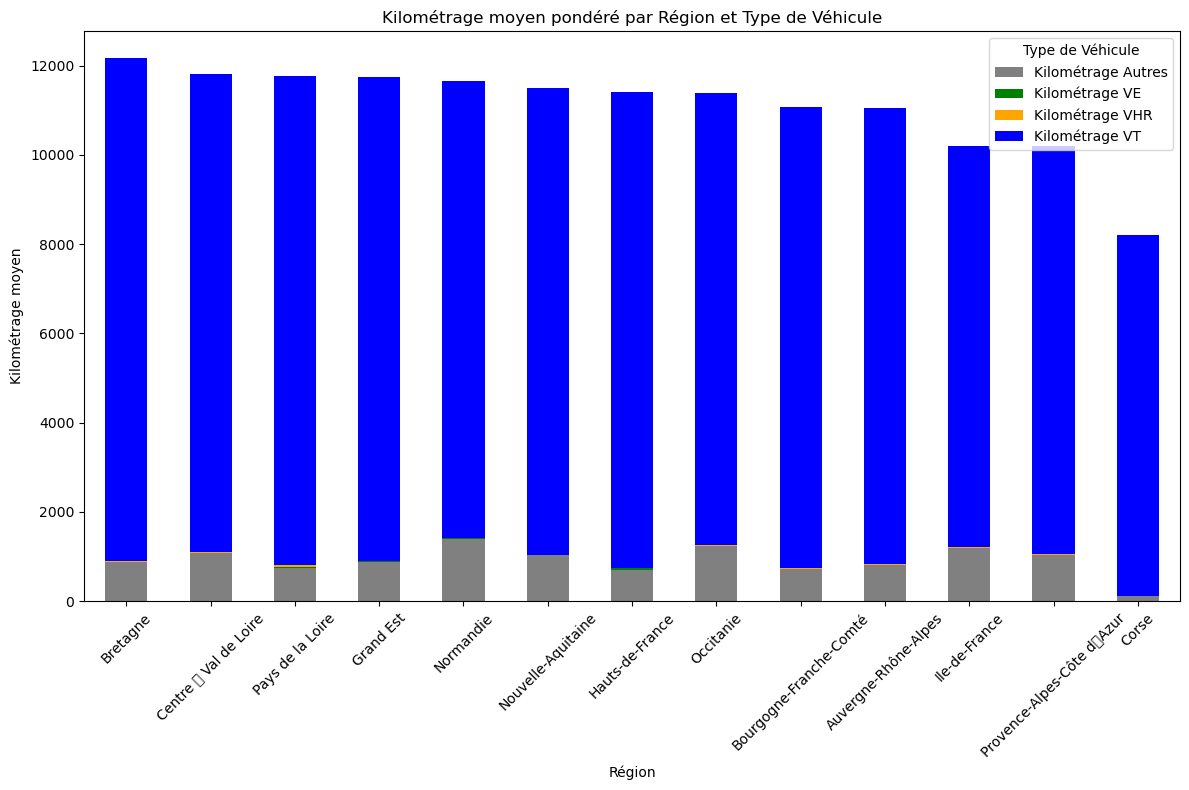

In [70]:

import pandas as pd
import matplotlib.pyplot as plt

# Supposons que df_fusion1 soit votre DataFrame

# Supprimer les valeurs manquantes
df_fusion1 = df_fusion1.dropna(subset=['KVKM1ANV', 'REG_res', 'energie_groupe'])

# Conversion en types appropriés
df_fusion1['KVKM1ANV'] = pd.to_numeric(df_fusion1['KVKM1ANV'], errors='coerce')  # Assurer un type numérique
df_fusion1['REG_res'] = df_fusion1['REG_res'].astype(str)  # Convertir REG_res en texte
df_fusion1['energie_groupe'] = df_fusion1['energie_groupe'].astype(str)  # Convertir energie_groupe en texte

# Calculer le kilométrage moyen total par région
kilometrage_moyen_total = df_fusion1.groupby('REG_res').apply(
    lambda x: (x['KVKM1ANV'] * x['pond_veh']).sum() / x['pond_veh'].sum()
)

 
# Calculer le kilométrage total pondéré par région
kilometrage_total_par_region = df_fusion1.groupby('REG_res').apply(
    lambda x: (x['KVKM1ANV'] * x['pond_veh']).sum()
)

# Calculer le kilométrage pondéré par type de véhicule et par région
kilometrage_par_vehicule = df_fusion1.groupby(['REG_res', 'energie_groupe']).apply(
    lambda x: (x['KVKM1ANV'] * x['pond_veh']).sum()
).unstack()

# Calculer les proportions pour chaque type de véhicule
proportion_par_vehicule = kilometrage_par_vehicule.div(kilometrage_total_par_region, axis=0)

 

# Calculer les contributions au kilométrage moyen total
contribution_par_vehicule = proportion_par_vehicule.multiply(kilometrage_moyen_total, axis=0)

# Créer un DataFrame pour les résultats
resultats = pd.DataFrame({
    'Région': kilometrage_moyen_total.index,
    'Kilométrage Total': kilometrage_moyen_total
})

# Ajouter les contributions de chaque type de véhicule au DataFrame
for vehicule in contribution_par_vehicule.columns:
    resultats[f'Kilométrage {vehicule}'] = contribution_par_vehicule[vehicule]

# Trier les résultats par kilométrage total décroissant
resultats = resultats.sort_values(by='Kilométrage Total', ascending=False)

# Définir une palette de couleurs personnalisée
colors = {
    'VE': 'green',
    'VHR': 'orange',
    'VT': 'blue',
    'Autres': 'gray'
}

# Créer une liste de couleurs dans l'ordre des colonnes
plot_colors = [colors[vehicule] for vehicule in contribution_par_vehicule.columns if vehicule in colors]

# Tracer le graphique empilé avec les couleurs personnalisées
resultats.set_index('Région').drop(columns=['Kilométrage Total']).plot(kind='bar', stacked=True, figsize=(12, 8), color=plot_colors)
plt.title('Kilométrage moyen pondéré par Région et Type de Véhicule')
plt.ylabel('Kilométrage moyen')
plt.xticks(rotation=45)
plt.legend(title='Type de Véhicule')
plt.tight_layout()
plt.show()
